In [1]:
import pandas as pd
import networkx as nx
import os
import numpy as np
body_path = os.path.abspath("C:\\Users\\Boran\\Downloads\soc-redditHyperlinks-body.tsv")
title_path = os.path.abspath("C:\\Users\\Boran\\Downloads\soc-redditHyperlinks-title.tsv")

if __name__ == "__main__":
    bodyData = pd.read_csv(body_path, sep='\t')
    titleData = pd.read_csv(title_path, sep='\t')
    df = bodyData.append(titleData, ignore_index=True)
    del df['PROPERTIES']


half_rows = int(len(df)/2)
half_rows

#df = df.iloc[half_rows:,:]

G = nx.from_pandas_edgelist(df,source='SOURCE_SUBREDDIT', target='TARGET_SUBREDDIT', edge_attr=['LINK_SENTIMENT'], create_using=nx.DiGraph())



Graph_n = nx.convert_node_labels_to_integers(G)


edges = list(Graph_n.edges())


#print(len(Graph_n.nodes),len(Graph_n.edges))
#for edge in edges:
#    print(edge[0],edge[1])


In [2]:
#link_sentiment = np.zeros(len(Graph_n.edges()))
#for u,v,data  in Graph_n.edges(data=True):
#    i = 0
#    link_sentiment[i] = data['LINK_SENTIMENT']
#    i = i+1

In [3]:
#RUN THIS, GIVES AN ERROR BUT CAN BE IGNORED

i = 0
node_sum = np.zeros((len(Graph_n.nodes())))
data_list = list(Graph_n.edges(data=True))
max_index = np.zeros((len(Graph_n.nodes())))
for u in Graph_n.nodes():
    while u == data_list[i][0]:
        #node_data[i] += (list(Graph_n.edges(data=True))[i][1],list(Graph_n.edges(data=True))[i][2]['LINK_SENTIMENT'])
        node_sum[u] += data_list[i][2]['LINK_SENTIMENT']
        i = i+1
    #print('i =',i)
    #print('u = ',u)
    max_index[u] = i-1

IndexError: list index out of range

In [4]:
nostring_data = np.zeros((len(data_list)))
array = np.array(data_list)
for u in range(len(data_list)):
    nostring_data[u] = array[:,2][u]['LINK_SENTIMENT']

In [5]:
var_node = np.zeros((len(Graph_n.nodes())))
average_sentiment = np.zeros((len(Graph_n.nodes())))
node_controversiality = np.zeros((len(Graph_n.nodes())))
for u in range(len(Graph_n.nodes())):
    max_index_number = int(max_index[u])
    var_node[u] = np.var(nostring_data[0:max_index_number])
    average_sentiment[u] = (node_sum[u]/(max_index[u]))
    node_controversiality[u] =  average_sentiment[u]/var_node[u]
    print(u)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

C:\Users\Boran\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3583: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Boran\anaconda3\lib\site-packages\numpy\core\_methods.py:185: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
C:\Users\Boran\anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-5-314727068a03>:7: RuntimeWarning: divide by zero encountered in double_scalars
  average_sentiment[u] = (node_sum[u]/(max_index[u]))


In [6]:
average_sentiment = np.zeros((len(Graph_n.nodes())))
node_controversiality = np.zeros((len(Graph_n.nodes())))
for u in range(len(Graph_n.nodes())):
    average_sentiment[u] = (node_sum[u]/(max_index[u]))
    node_controversiality[u] =  average_sentiment[u]/var_node[u]

<ipython-input-6-790ac879b170>:4: RuntimeWarning: divide by zero encountered in double_scalars
  average_sentiment[u] = (node_sum[u]/(max_index[u]))


In [7]:
node_controversiality = np.delete(node_controversiality,67179)

In [9]:
print(np.argsort(abs(node_controversiality)))

[33589 33305 33299 ...     3    11     0]


In [10]:
ranking = np.flip(np.argsort(abs(node_controversiality)))

In [11]:
print(ranking)

[    0    11     3 ... 33299 33305 33589]


In [12]:
rankingtop100 = ranking[:100]

In [13]:
connected_nodes1 = []
for u in range(len(rankingtop100)):
    connected_nodes1.append(list(Graph_n.neighbors(rankingtop100[u])))


In [14]:
import random

amount_of_connected_nodes = np.zeros(len(rankingtop100))

connected_nodes1_random = []

for u in range(len(rankingtop100)):
    amount_of_connected_nodes = int(0.1 * len(connected_nodes1[u]))
    connected_nodes1_random.append(random.sample(connected_nodes1[u], amount_of_connected_nodes))

In [15]:
temp_list = []

for u in range(len(connected_nodes1_random)):
    for i in connected_nodes1_random[u]:
        if i not in temp_list:
            temp_list.append(i)

In [16]:
unique_connected_nodes = []
for u in range(len(connected_nodes1_random)):
    unique_connected_nodes.append(set(connected_nodes1_random[u]) & set(temp_list))

In [17]:
connected_nodes2 = []
for u in range(len(rankingtop100)):
    for i in range(len(unique_connected_nodes[u])):
        connected_nodes2.append(list(Graph_n.neighbors(list(unique_connected_nodes[u])[i])))

In [18]:
connected_nodes2_random = []
connected_nodes2_without_nodes1 = []

for u in range(len(rankingtop100)):
    connected_nodes2_without_nodes1 = list(set(connected_nodes2[u])^set(connected_nodes1[u]))
    amount_of_connected_nodes = int(0.1 * len(connected_nodes2_without_nodes1))
    connected_nodes2_random.append(random.sample(connected_nodes2_without_nodes1, amount_of_connected_nodes))

In [19]:
final_node_set = []

for u in range(len(rankingtop100)):
    final_neighbor_set = set(connected_nodes2_random[u]) | set(connected_nodes1_random[u])
    final_node_set.append(final_neighbor_set | set([rankingtop100[u]]))

In [20]:
final_node_list = []
for u in range(len(final_node_set)):
    final_node_list.append(list(final_node_set[u]))

In [21]:
final_node_list_unique = []

for u in range(len(final_node_set)):
    for i in final_node_list[u]:
        if i not in final_node_list_unique:
            final_node_list_unique.append(i)

In [22]:
ranked_graph = Graph_n.subgraph(list(final_node_list_unique))

In [23]:
final_graph = nx.convert_node_labels_to_integers(ranked_graph)
print(len(final_graph.nodes),len(final_graph.edges))
edges = list((final_graph.edges()))
for edge in edges:
    print(edge[0],edge[1])

5384 137314
0 1
0 38
0 589
0 302
0 935
0 852
0 11
0 1605
0 549
0 709
0 588
0 51
0 513
0 1823
0 1839
0 1908
0 768
0 182
0 27
0 228
0 1361
0 1270
0 77
0 105
0 132
0 266
0 955
0 258
0 2621
0 1819
0 306
0 212
0 916
0 301
0 1670
0 2905
0 492
0 562
0 156
0 47
0 2608
0 3
0 165
0 1771
0 508
0 149
0 138
0 1627
0 284
0 152
0 836
0 1613
0 115
0 251
0 15
0 2557
0 644
0 693
0 2172
0 580
0 6
0 168
0 704
0 2859
0 291
0 3653
0 689
0 349
0 2006
0 2061
0 1049
0 33
0 3297
0 1539
0 628
0 129
0 458
0 3854
0 3408
0 806
0 2031
0 354
0 128
0 59
0 4026
0 1162
0 4036
0 630
0 1909
0 663
0 39
0 63
0 136
0 49
0 119
0 4128
0 1128
0 293
0 249
0 406
0 1080
0 4404
0 83
0 761
0 4135
0 330
0 75
0 256
0 130
0 1406
0 4595
0 1484
0 4150
0 597
0 4553
0 4732
0 4139
0 4661
0 1047
0 3923
0 4452
0 183
0 4909
0 4111
0 989
0 2088
0 749
0 5016
0 552
0 2616
0 802
0 3986
0 3480
0 308
0 3867
0 1709
0 122
0 7
0 3483
0 103
0 5252
0 4990
0 1465
0 2775
0 320
0 1266
0 553
0 1294
0 193
0 2974
0 1753
0 3065
0 317
0 213
0 696
0 41
0 235
0 22

In [24]:
graphie = nx.from_edgelist(edges)

In [25]:
print(len(graphie.nodes),len(graphie.edges))
edges = list((graphie.edges()))
for edge in edges:
    print(edge[0],edge[1])



5384 122272
0 1
0 38
0 589
0 302
0 935
0 852
0 11
0 1605
0 549
0 709
0 588
0 51
0 513
0 1823
0 1839
0 1908
0 768
0 182
0 27
0 228
0 1361
0 1270
0 77
0 105
0 132
0 266
0 955
0 258
0 2621
0 1819
0 306
0 212
0 916
0 301
0 1670
0 2905
0 492
0 562
0 156
0 47
0 2608
0 3
0 165
0 1771
0 508
0 149
0 138
0 1627
0 284
0 152
0 836
0 1613
0 115
0 251
0 15
0 2557
0 644
0 693
0 2172
0 580
0 6
0 168
0 704
0 2859
0 291
0 3653
0 689
0 349
0 2006
0 2061
0 1049
0 33
0 3297
0 1539
0 628
0 129
0 458
0 3854
0 3408
0 806
0 2031
0 354
0 128
0 59
0 4026
0 1162
0 4036
0 630
0 1909
0 663
0 39
0 63
0 136
0 49
0 119
0 4128
0 1128
0 293
0 249
0 406
0 1080
0 4404
0 83
0 761
0 4135
0 330
0 75
0 256
0 130
0 1406
0 4595
0 1484
0 4150
0 597
0 4553
0 4732
0 4139
0 4661
0 1047
0 3923
0 4452
0 183
0 4909
0 4111
0 989
0 2088
0 749
0 5016
0 552
0 2616
0 802
0 3986
0 3480
0 308
0 3867
0 1709
0 122
0 7
0 3483
0 103
0 5252
0 4990
0 1465
0 2775
0 320
0 1266
0 553
0 1294
0 193
0 2974
0 1753
0 3065
0 317
0 213
0 696
0 41
0 235
0 22

In [27]:
gesorteerd = sorted(edges, key=lambda tup: tup[0])

In [28]:
print(gesorteerd)

[(0, 1), (0, 38), (0, 589), (0, 302), (0, 935), (0, 852), (0, 11), (0, 1605), (0, 549), (0, 709), (0, 588), (0, 51), (0, 513), (0, 1823), (0, 1839), (0, 1908), (0, 768), (0, 182), (0, 27), (0, 228), (0, 1361), (0, 1270), (0, 77), (0, 105), (0, 132), (0, 266), (0, 955), (0, 258), (0, 2621), (0, 1819), (0, 306), (0, 212), (0, 916), (0, 301), (0, 1670), (0, 2905), (0, 492), (0, 562), (0, 156), (0, 47), (0, 2608), (0, 3), (0, 165), (0, 1771), (0, 508), (0, 149), (0, 138), (0, 1627), (0, 284), (0, 152), (0, 836), (0, 1613), (0, 115), (0, 251), (0, 15), (0, 2557), (0, 644), (0, 693), (0, 2172), (0, 580), (0, 6), (0, 168), (0, 704), (0, 2859), (0, 291), (0, 3653), (0, 689), (0, 349), (0, 2006), (0, 2061), (0, 1049), (0, 33), (0, 3297), (0, 1539), (0, 628), (0, 129), (0, 458), (0, 3854), (0, 3408), (0, 806), (0, 2031), (0, 354), (0, 128), (0, 59), (0, 4026), (0, 1162), (0, 4036), (0, 630), (0, 1909), (0, 663), (0, 39), (0, 63), (0, 136), (0, 49), (0, 119), (0, 4128), (0, 1128), (0, 293), (0, 2

In [29]:
nx.info(final_graph)

'Name: \nType: DiGraph\nNumber of nodes: 5384\nNumber of edges: 137314\nAverage in degree:  25.5041\nAverage out degree:  25.5041'

In [30]:
!pip install python-louvain

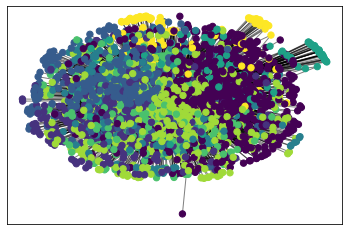

In [31]:
import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
G = final_graph.to_undirected()
partition = community_louvain.best_partition(G)

# draw the graph
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [46]:
nx.average_clustering(final_graph)

0.32070902113711913

In [55]:
list_degree = list(G.degree)
degree_node = np.zeros(len(list_degree))
for u in range(len(list_degree)):
    degree_node[u] = list_degree[u][1]

In [59]:
np.argmax(degree_node)

575